# Titanic: Machine Learning from Disaster

## Introduction

> The sinking of the RMS Titanic is one of the most infamous shipwrecks in history.  On April 15, 1912, during her maiden voyage, the Titanic sank after colliding with an iceberg, killing 1502 out of 2224 passengers and crew. This sensational tragedy shocked the international community and led to better safety regulations for ships.

>One of the reasons that the shipwreck led to such loss of life was that there were not enough lifeboats for the passengers and crew. Although there was some element of luck involved in surviving the sinking, some groups of people were more likely to survive than others, such as women, children, and the upper-class.

>In this challenge, we ask you to complete the analysis of what sorts of people were likely to survive. In particular, we ask you to apply the tools of machine learning to predict which passengers survived the tragedy.

** Import dependencies **

In [457]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from patsy import dmatrices

** Variable Descriptions **

## Read the Data

Read the data and diplay the first 5 rows

In [458]:
titanic = pd.read_csv("data/train.csv")

# display the 5 first rows
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35,0,0,373450,8.0500,NaN,S


Lets see how many non-NA/null observations there are for every variable

In [459]:
titanic.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

Cabin seems to have a lot of missing values, so we drop it..

In [460]:
# TODO: Instead of dropping - consider filling the missing values with some estimates instead of throwing it away

titanic = titanic.drop(['Cabin'], axis=1) 
titanic = titanic.dropna()

Lets see how many rows we have left

In [461]:
len(titanic)

712

Calculate some basic statistical figures for the non-categorical columns

In [303]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,448.589888,0.404494,2.240169,29.642093,0.514045,0.432584,34.567251
std,258.683191,0.491139,0.836854,14.492933,0.930692,0.854181,52.938648
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,222.750000,0.000000,1.000000,20.000000,0.000000,0.000000,8.050000
50%,445.000000,0.000000,2.000000,28.000000,0.000000,0.000000,15.645850
75%,677.250000,1.000000,3.000000,38.000000,1.000000,1.000000,33.000000
max,891.000000,1.000000,3.000000,80.000000,5.000000,6.000000,512.329200


## Plotting the Features

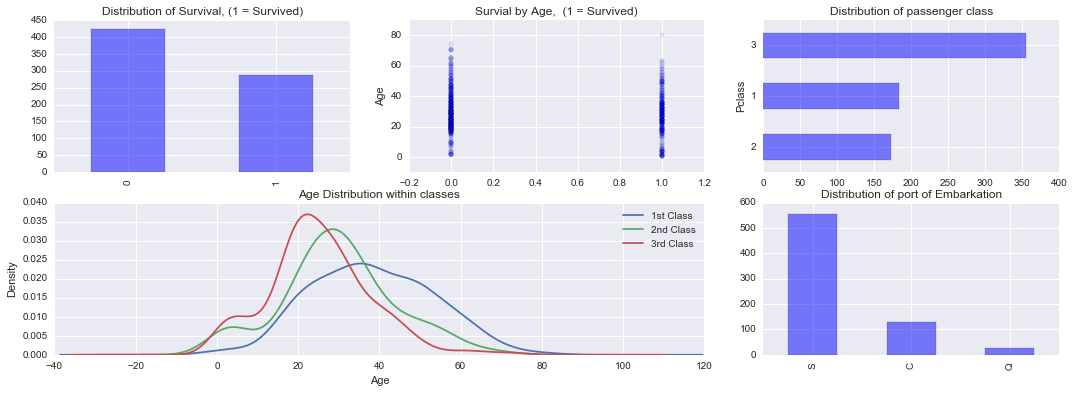

In [306]:
fig = plt.figure(figsize=(18, 6)) 

plt.subplot2grid((2, 3), (0, 0))
titanic.Survived.value_counts().plot(kind='bar', alpha=0.5)
plt.title("Distribution of Survival, (1 = Survived)")

plt.subplot2grid((2, 3), (0, 1))
plt.scatter(titanic.Survived, titanic.Age, alpha=0.1)
plt.ylabel("Age")
plt.title("Survial by Age,  (1 = Survived)")

plt.subplot2grid((2, 3), (0, 2))
titanic.Pclass.value_counts(ascending=True).plot(kind='barh', alpha=0.5)
plt.ylabel("Pclass")
plt.title("Distribution of passenger class")
 
plt.subplot2grid((2, 3),(1, 0), colspan=2)
df.Age[df.Pclass == 1].plot(kind='kde')    
df.Age[df.Pclass == 2].plot(kind='kde')
df.Age[df.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'), loc='best')

plt.subplot2grid((2, 3), (1, 2))
titanic.Embarked.value_counts().plot(kind='bar', alpha=0.5);
plt.title("Distribution of port of Embarkation")

## Exploratory Data Analysis

We wish to predict whether or not a passenger will survive or not. We are therefore interested in finding out what information or features can help us determine the probability that a passenger survived or perished.

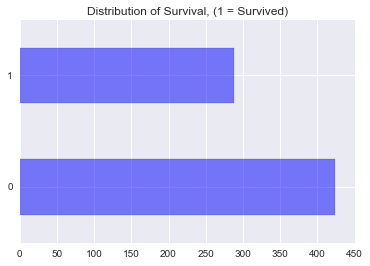

In [307]:
titanic.Survived.value_counts().plot(kind='barh', alpha=.5)
plt.title("Distribution of Survival, (1 = Survived)");

### Let us start breaking it down by gender

> **Women** and children first is a historical code of conduct whereby the lives of women and children were to be saved first in a life-threatening situation (typically abandoning ship, when survival resources such as lifeboats were limited).

In [308]:
titanic.Sex.value_counts(); 
# TODO: Pivot table showing survival rates...

male      453
female    259
Name: Sex, dtype: int64

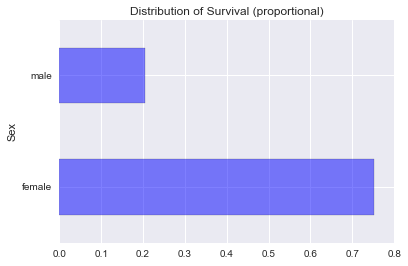

In [309]:
titanic.pivot_table('Survived', index='Sex').plot(kind='barh', alpha=0.5)
plt.title("Distribution of Survival (proportional)");

We could also get the raw numbers using the groupby function in Pandas

In [310]:
titanic.groupby('Sex')[['Survived']].mean()

,Survived
Sex,
female,0.752896
male,0.205298


As you can see females had a significantly higher change of surviving (75.29%) compared to males (20.53%).

## Passenger Class

> Some random quote about income and life expectancy

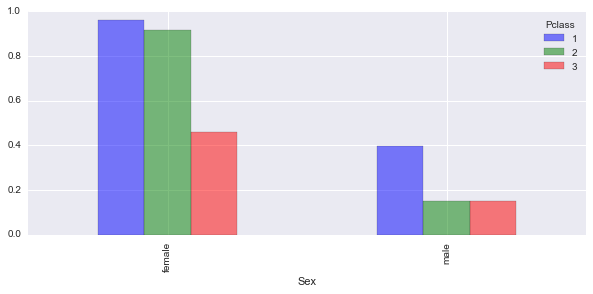

In [438]:
colormaps = ['Greens', 'Blues', 'Oranges']

# TODO: Make this bigger og separate into two plots
titanic.pivot_table('Survived', index='Sex', columns='Pclass').plot(kind='bar', alpha=0.5, figsize=(10, 4));

We can also get the exact numbers using the pivot_table functionality of Pandas

In [312]:
titanic.pivot_table('Survived', index='Sex', columns='Pclass')

Pclass,1,2,3
Sex,,,
female,0.963855,0.918919,0.460784
male,0.396040,0.151515,0.150198


The data clearly shows that - the higher the class - the higher the survival rate

## Age

> Women and **children** first...

Lets see how the passengers age affected their chance of survival

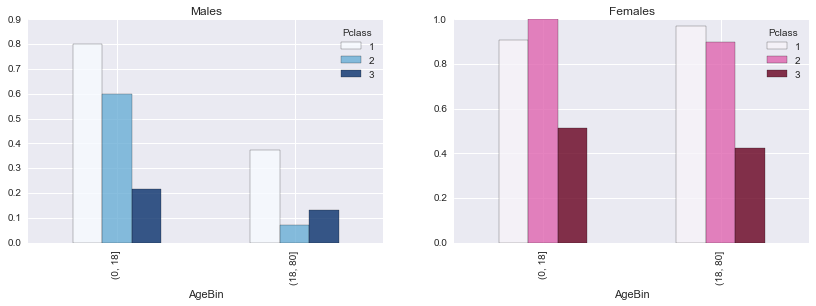

In [436]:
# Create two age bins
age = pd.cut(titanic['Age'], [0, 18, 80])

# Helper function for adding column to dataframe
def func(row):
    return pd.cut([row['Age']], [0, 18, 80])[0]

# Add AgeBin column to the dataframe
titanic['AgeBin'] = df.apply(func, axis=1)

males = titanic[titanic.Sex == 'male']
females = titanic[titanic.Sex == 'female']

f, (ax1, ax2) = plt.subplots(1, 2)

males.pivot_table('Survived', ['AgeBin'], 'Pclass').plot(kind='bar', colormap='Blues', alpha=0.8, ax=ax1, figsize=(14, 4))
ax1.set_title('Males');

females.pivot_table('Survived', ['AgeBin'], 'Pclass').plot(kind='bar', colormap='PuRd', alpha=0.8, ax=ax2, figsize=(14, 4))
ax2.set_title('Females');

titanic = titanic.drop(['AgeBin'], axis=1)

We can see that young males in particular have a much higher chance of surving than males above the age of 18.

## Model Building

### Random Forest

> Random forests are an ensemble learning method for classification (and regression) that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes output by individual trees.

TODO: Some rant about why random forests work...

In [439]:
from sklearn.ensemble import RandomForestClassifier

# Our forumla in the format "y ~ x1 + x2"
features = 'Survived ~ C(Pclass) + C(Sex) + Age + SibSp + Parch + C(Embarked)'

y, X = dmatrices(features, data=titanic, return_type='dataframe')

y = np.asarray(y).ravel()

# Fir the random forest classifier
clf = RandomForestClassifier(n_estimators=500).fit(X, y)

clf.score(X, y)

0.9452247191011236

It is generally not a good idea to test our model on the same data used for training. If we optimize our estimator this way, we will tend to over-fit the data: that is, we learn the noise.

#### Hold-out datasets

A better way to test a model is to use a hold-out set which doesnt enter the training.

In [440]:
from sklearn.datasets import load_digits
from sklearn.cross_validation import train_test_split

# Generate a 75:25 hold-out dataset
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Fit the model model
clf.fit(X_train, y_train)

# Predict labels for our hold-out dataset
y_pred = clf.predict(X_test)

# Score our new model
clf.score(X_test, y_test)

0.8089887640449438

In this particular case - data is extremely limited. One of the main problems with validation sets is that you "lose" some of the data, for example in the above example we only used 75% of our data to train the model. Another option is to use **K-fold cross-validation** where you split the data into K chunks and perform K fits, where each chunk gets a turn as the validation set.

In [441]:
from sklearn.cross_validation import cross_val_score

#Perform 10-fold cross validation on KNN classifier with n_neighbors = 1
cv = cross_val_score(RandomForestClassifier(n_estimators=100), X, y, cv=10)

# Mean model score
cv.mean()

0.79255533199195172

This will give us an even better idea of how well our model is doing. Lets see if we can improve our models performance by finding the optimal parameters through search

### Finding the optimal model parameters

In [452]:
from time import time

from sklearn.grid_search import GridSearchCV
from scipy.stats import randint as sp_randint

clf = RandomForestClassifier()

param_grid = {"max_depth": [3, None],
              "n_estimators": [200, 700],
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}

grid_search = GridSearchCV(clf, param_grid=param_grid, cv=5)

start = time()

# Test all models
grid_search.fit(X, y)

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.grid_scores_)))
print()

grid_search.best_params_, grid_search.best_score_

GridSearchCV took 38.30 seconds for 16 candidate parameter settings.



({'bootstrap': True, 'criterion': 'gini', 'max_depth': 3, 'n_estimators': 200},
 0.8103932584269663)

### Making Predictions

In [474]:
test_data = pd.read_csv("data/test.csv")

numeric_var = ['Pclass', 'Age', 'SibSp', 'Parch', 'Embarked']

test_data = pd.concat([test_data[numeric_var],
                           pd.get_dummies(test_data['Sex'], prefix='Sex'),
                           pd.get_dummies(test_data['Embarked'], prefix='Embarked')],
                          axis=1)

test_data = test_data.drop(['Sex', 'Embarked'], axis=1)

# Clean test data (age have some missing values)

print(test_data)

# Predict outcomes for the test set
#output = grid_search.predict(test_data)

# Generate submission file

     Pclass   Age  SibSp  Parch  Sex_female  Sex_male  Embarked_C  Embarked_Q  \
0         3  34.5      0      0           0         1           0           1   
1         3  47.0      1      0           1         0           0           0   
2         2  62.0      0      0           0         1           0           1   
3         3  27.0      0      0           0         1           0           0   
4         3  22.0      1      1           1         0           0           0   
5         3  14.0      0      0           0         1           0           0   
6         3  30.0      0      0           1         0           0           1   
7         2  26.0      1      1           0         1           0           0   
8         3  18.0      0      0           1         0           1           0   
9         3  21.0      2      0           0         1           0           0   
10        3   NaN      0      0           0         1           0           0   
11        1  46.0      0    